# Table of Contents
 <p><div class="lev1"><a href="#Adaptive-Filters">Adaptive Filters</a></div><div class="lev2"><a href="#A-general-filtering-problem">A general filtering problem</a></div><div class="lev3"><a href="#Introduction">Introduction</a></div><div class="lev3"><a href="#The-Linear-Minimum-Mean-Square-Error-Estimator">The Linear Minimum Mean Square Error Estimator</a></div><div class="lev3"><a href="#The-Least-Square-Error-Estimator">The Least Square Error Estimator</a></div><div class="lev3"><a href="#Application-to-filter-identification">Application to filter identification</a></div>

In [2]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
... Redefining interactive from ipywidgets


# Adaptive Filters

Adaptive filters are systems that are able to adapt their coefficients with respect to the properties of their environment, in order to satisfy a given objective. Furthermore, they may also be able to adapt themselves to modifications of the environment and track them. Many real-world applications employ adaptive filters, as Hearing aids, Localization and tracking
Active noise control (anti-noise), Noise suppression, Audio upmix of stereo signals,Adaptive beamforming, MPEG audio coding, Non-linear echo cancellation, Adaptation of neural networks, etc. 
The following figure, taken from [Ref][1], presents  some possible applications:

![](ExamplesApplications.png)

We will first begin by describing the general filtering problem and derive the optimal solution, known as the Wiener filter. We will then explain how the solution can be obtained through iterative algorithms. Finally, we will describe how these algorithms can be turned into adaptive filters. 


[1]:  M. Harteneck and R.W. Stewart, Adaptive Digital Signal Processing JAVA Teaching Tool, IEEE  TRANSACTIONS  ON EDUCATION, MAY 2001, VOLUME 44, NUMBER 2,  IEEDAB 	(ISSN 0018-9359) [online here](http://www.ewh.ieee.org/soc/es/May2001/19/Begin.htm)

## A general filtering problem

In what follows, we will consider a general problem, which is sometimes called the `Wiener problem`.  Many actual problems, including filter identification, noise cancellation, linear prediction, etc can be formulated as special cases of this Wiener problem. 

![](GenericWiener.png)

The classical formulation is as follows: Given a random signal $u(n)$, we would like to find a transform $\mathcal{T}\{u\}$ such that the result is as close as possible to some `desired response` $d(n)$. We will restrict this general problem on two aspects. 

- First, we will only consider  `linear` transforms of the sequence $\{u(n)\}_{n=0..N-1}$; that is filterings of $u(n)$. Furthermore, we will even restrict ourselves to causal, finite impulse response filters with $p$ taps. We denote by $w$ (with $w$ for Wiener) the impulse response. For now, we assume that the system is stationary, which implies that the impulse response does not depend on time $n$. Hence, the output can be computed as the convolution product
\begin{equation}
\label{eq:filt}
y(n) = [w*u](n) = \sum_{m=0}^{p-1} w(m)u(n-m)
\end{equation}
- Second, the notion of  ``as close as'' will be quantified by a cost function on the error
\begin{equation}
\label{eq:error}
e(n) =  y(n) - d(n).
\end{equation}
Any cost function could be used, such as $|\bullet|$, $|\bullet|^2$, $|\bullet|^3$ or even $\sinh{e(n)}$... Among these possibilities, the square of the error yields interesting, closed-form solutions and simple computations. 

We can  choose to work only with the sequences at hand and look at an integrated error such as
\begin{equation}
\label{eq:LScriterion}
J_\mathrm{ls}(w,n_0,n_1) =  \sum_{n=n_0}^{n_1} {e(n)^2}
\end{equation}
Such a criterion is called the Least Square criterion. 
We may also choose to work with the stochastic processes on average, and consider a `mean square error`
\begin{equation}
\label{eq:MSEcriterion}
J_\mathrm{mse}(w,n) =  \E{e(n)^2}.
\end{equation}
The corresponding criterion is the Minimum Mean Square Error criterion. 
 

### Introduction

Definitions
$$\def\ub{\mathbf{u}}
\def\wb{\mathbf{w}}
\def\wbopt{\mathop{\mathbf{w}}\limits^\triangle}
\def\deriv#1#2{\frac{\mathrm{d}#1}{\mathrm{d}#2}}
\def\Ub{\mathbf{U}}
\def\db{\mathbf{d}}
\def\eb{\mathbf{e}}
$$

### The Linear Minimum Mean Square Error Estimator

Let us define by $\ub(n)$ the $p\times1$  column vector collecting $p$ consecutive samples of the input
$$\ub(n)^T=\left[ u(n), u(n-1), \ldots u(n-p+1)\right],$$
and by $\wb$ the vector collecting the samples of the impulse response:
$$\wb^T=\left[ w(0), w(1), \ldots w(p-1)\right].$$
Clearly, the output (\ref{eq:filt}) of  filter $\wb$  can be written as the dot product $y(n)=\wb^T\ub(n)$, and the error is simply 
$$
e(n) = \wb^T\ub(n) - d(n). 
$$
Observe that $J_\mathrm{mse}(\wb,n) $  is a quadratic form in $\wb$. Therefore, the criterion admits a single global minimum. To see this, let us develop the MSE:

\begin{align}
J_\mathrm{mse}(\wb,n) &  = \E{\left(\wb^T\ub(n) - d(n) \right)\left(\ub(n)^T\wb(n) - d(n) \right)} \\
 & = \wb^T \E{\ub(n) \ub(n)^T}\wb - 2\wb^T \E{\ub(n)d(n)} + \E{d(n)^2}  \\
 & = \wb^T \Rb_{uu} \wb - 2\wb^T \Rb_{du} +\sigma_d^2 \label{eq:MSEdev}
\end{align}

where we  denoted 
$$
\begin{cases}
\Rb_{uu} = \E{\ub(n) \ub(n)^T} & \text{the correlation matrix of $\ub(n)$} \\
\Rb_{du} = \E{d(n) \ub(n) } & \text{the correlation vector of $d(n)$ and $\ub(n)$} 
\end{cases}
$$
We also used the fact that the dot product between two vectors is scalar and therefore equal to its transpose: e.g. $\wb^T\ub(n)=\ub(n)^T\wb$. 

From formula (\ref{eq:MSEdev}), it can be checked that the MSE can also be put into the form of a perfect square, as
\begin{equation}
J_\mathrm{mse}(\wb,n)  =  (\wb-\wbopt)^T \Rb_{uu} (\wb-\wbopt) - \wbopt ~^T\Rb_{uu}\wbopt +\sigma_d^2 \label{eq:MSEasperfectsaquare}
\end{equation}
if
\begin{equation}
\eqboxc{
\wbopt:  \Rb_{uu} \wbopt= \Rb_{du} }
\label{eq:normaleq} 
\end{equation}
Since the quadratic form in (\ref{eq:MSEasperfectsaquare}) is always nonnegative, we see that the MSE is minimum if and only if 
\begin{equation}
\eqboxd{
\wb=\wbopt=\Rb_{uu}^{-1} \Rb_{du} ,}
\label{eq:wopt} 
\end{equation}
assuming that $\Rb_{uu}$ is invertible. The minimum error is then given by
\begin{equation}
\eqboxb{
J_\mathrm{mse}(\wbopt,n)  =  \sigma_d^2 - \wbopt ~^T\Rb_{du}  
}
\label{eq:MSEminimum}
\end{equation}


Alternatively, the minimum can also be found by equating the derivative of the criterion to zero. Indeed, this derivative is 
$$
\deriv{} {\wb} J_\mathrm{mse}(\wb,n)= \deriv{\E{e(n)^2}} {\wb} = 2 \E{ \deriv{e(n)}{\wb} e(n) }. 
$$
Since $e(n) = \wb^T\ub(n) - d(n)$, its derivative with respect to $\wb$ is $\ub(n)$, and it remains
\begin{align}
\deriv{ } {\wb} J_\mathrm{mse}(\wb,n) & = 2 \E{ \ub(n) e(n) } \\ 
&= 2 \E{ \ub(n) \left(\ub(n)^T\wb - d(n)\right)  }   \\
& = 2 \left(\Rb_{uu} \wb -  \Rb_{du} \right).     
\end{align}
Hence, the derivative is zero if and only if $\Rb_{uu} \wb = \Rb_{du} $ which is the solution (\ref{eq:wopt}). 

Interestingly, we see that the optimum estimator depends only on the second order properties of  the desired response and the input sequence. This is a consequence of our choice of restricting ourselves to a quadratic criterion and a linear transform. 

### The Least Square Error Estimator

The derivation of the least-squares estimator closely follows the steps we used for the MMSE estimator. This follows easily once the problem is formulated in matrix form. 
Define the error vector as $\mathbf{e}(n_0,n_1)^T = \left[ e(n_0), e(n_0+1), \ldots e(n_1)\right]$. Each component of the error, say $e(k)$ is equal to 
$$e(k)= \ub(k)^T\wb - d(k).$$ 
Therefore, we have
\begin{equation}
\begin{bmatrix}
u(n_0) & u(n_0-1) & \ldots & u(n_0-p+1) \\
u(n_0+1) & u(n_0) & \ldots & u(n_0-p+2) \\
\vdots & \ddots & & \vdots  \\
u(n_1) & u(n_1-1) & \ldots & u(n_1-p+1) \\
\end{bmatrix} 
\wb 
- 
\begin{bmatrix}
d(n_0) \\
d(n_0+1) \\
\vdots  \\
d(n_1)\\
\end{bmatrix} 
=
\begin{bmatrix}
e(n_0) \\
e(n_0+1) \\
\vdots  \\
e(n_1)\\
\end{bmatrix}. 
\end{equation}
This can also be written in compact form as
$$
\Ub(n_0,n_1)\wb - \db(n_0,n_1) = \eb(n_0,n_1).
$$
Then, the LS criterion (\ref{eq:LScriterion}) can be reformulated as
$$
J_\mathrm{ls}(w,n_0,n_1)   =  \sum_{n=n_0}^{n_1} {e(n)^2} =  \eb(n_0,n_1)^T \eb(n_0,n_1) 
$$
that is 
$$
J_\mathrm{ls}(w,n_0,n_1)  = \left( \Ub(n_0,n_1)\wb - \db(n_0,n_1)\right)^T \left( \Ub(n_0,n_1)\wb - \db(n_0,n_1)\right). 
$$
Now, it is a simple task to compute the derivative of this LS criterion with respect to $\wb$. One readily obtain
$$
\deriv{} {\wb} J_\mathrm{ls}(w,n_0,n_1)  = 2  \Ub(n_0,n_1)^T \left( \Ub(n_0,n_1)\wb - \db(n_0,n_1)\right),
$$
which is equal to zero if and only if
\begin{equation}
\Ub(n_0,n_1)^T \Ub(n_0,n_1) \wb = \Ub(n_0,n_1)^T \db(n_0,n_1). 
\label{eq:LSestimate1}
\end{equation}


The different matrices and vectors above depend on two indexes $n_0$ and $n_1$. It is now time to discuss the meaning of these indexes and the possible choices for their values. Suppose that the data are available on $N$ samples, from $n=0$ to $n=N-1$. When we want to compute the error $e(k)$, with $k<p$, we see that the result depend on unobserved values. The same kind of problem occurs if we want to compute the error for $k>N-1$. Therefore we face the problem of affecting a value to unobserved values. A possibility is to take a value of zero for unobserved vales. Another possibility consists in affecting the values by periodization, modulo $N$, of the available data. A last possibility is to avoid the situations which request the use of unknown values.  

The two main choices are the following:

- If we want to use only known values, it suffices to restrict the summation interval to the interval with $n_0=p-1$ and $n_1=N-1$. The matrix $\Ub$ has dimensions $(N-p)\times p$.This choice is sometimes known as the `covariance form`. 
- If we choose $n_0=0$ and $n_1=N-p-2$, with unknown values taken as zero, the corresponding choice is called `correlation form`. The data matrix has now dimensions $N+p-1 \times p$. 

It is now easy to see that the generic term of 
$\left[\Ub(n_0,n_1)^T \Ub(n_0,n_1) \right]_{ij}$ has the form $\sum_n u(n-i) u(n-j)$, that is, is (up to a factor) an estimate of the correlation $R_{uu}(i-j)$. Consequently, we have an estimate  of the correlation matrix $\Rb_{uu}$ given by
$$
\hat{\Rb}_{uu} = \left[\Ub(n_0,n_1)^T \Ub(n_0,n_1) \right].
$$ In the case of the choice of the correlation form for the data matrix, the resulting estimate of the correlation matrix has Toeplitz symmetry. It is interesting to note that by construction, the estimated correlation matrix is automatically non-negative definite.  Similarly, $\Rb_{du}$  can be estimated as 
$$ 
\hat{\Rb}_{du} = \Ub(n_0,n_1)^T \db(n_0,n_1).
$$
Finally, the LS estimate is 
\begin{equation}
\eqboxd{
\wbopt ~_{ls} = \left[ \Ub(n_0,n_1)^T \Ub(n_0,n_1)\right]^{-1}    \Ub(n_0,n_1)^T \db(n_0,n_1) =\hat{\Rb}_{uu}^{-1}  \hat{\Rb}_{du} }.
\label{eq:LSestimate2}
\end{equation}

### Application to filter identification

\label{sec:filterident}
We will apply these results to the problem of filter identification. Let us briefly state the problem: we observe the noisy output $y$ of an unknown system with impulse response $h_\mathrm{test}$ and a known input $x$. The goal is to identify  $h_\mathrm{test}$ given $y$ and $x$. 

This figure is taken from [cnx.org](http://cnx.org/contents/0064a063-1735-4a49-a114-46391e362992@4.10:63/Fundamentals_of_Signal_Process)

![](SystemIdentification.png)

>We begin by simulating the problem. You may use the function `lfilter` to compute the output of the system. Take for $x$ a gaussian noise, `np.random.normal` or `np.random.randn`,  with unit variance on $N$ points, and add  a gaussian noise with scale factor 0.1 on the output. 

In [ ]:
# DO IT YOURSELF!
#
from scipy.signal import lfilter
N=0  # update this
x=0  # update this
htest=10*np.array([1, 0.7, 0.7, 0.7, 0.3, 0 ])
y0=0 # FILL IN SOMETHING CORRECT HERE
y=0 # FILL IN SOMETHING CORRECT HERE
#y0 = #noiseless output
#y= #noisy output

plt.plot(y)
plt.xlabel("Time")
plt.title("Observation")
figcaption("System output in an identification problem")

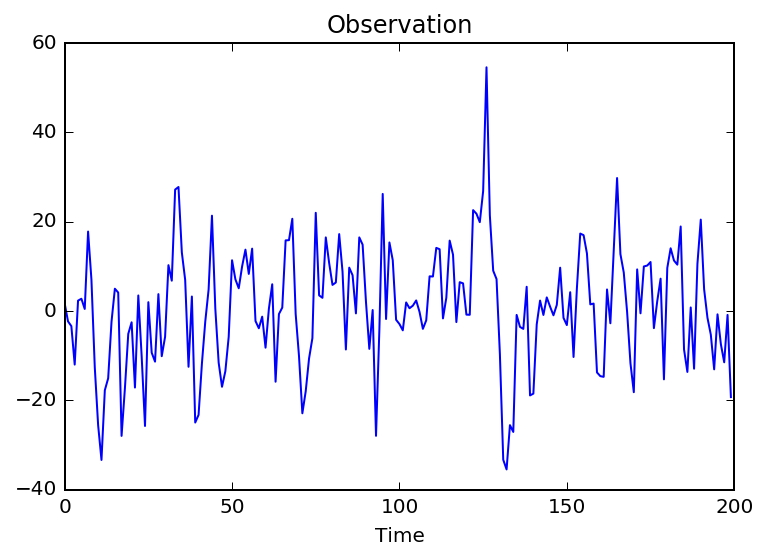

In [8]:
from scipy.signal import lfilter
# test
N=200
x=np.random.randn(N)
htest=10*np.array([1, 0.7, 0.7, 0.7, 0.3, 0 ])
#L=size(htest)
#yo=zeros(N)
#for t in range(L,200):
#    yo[t]=htest.dot(x[t:t-L:-1])
#y=yo+ 0.1*randn(N)
y=lfilter(htest,[1],x)+0.1*randn(N)
plt.plot(y)
plt.xlabel("Time")
plt.title("Observation")
figcaption("System output in an identification problem")

Once this is done, we shall solve the normal equation (\ref{eq:normaleq}). Of course, we firts need to estimate the correlation matrix $\Rb_{uu}$ and the correlation vector $\Rb_{du}$. This can be done with the functions `xcorr` and `toeplitz`. Beware on the fact that `xcorr` returns two vectors and that the returned correlation vector is the symmetric sequence with positive and negative indexes. 

>Now, in order to implement the identification procedure, one has to put the problem as a Wiener problem and identify the input sequence $u$ and the desired one $d$. Actually, here one 
should simply observe that we look for a filter, which excited by the same  $x(n)$ should yield an output $z(n)$ as similar as  $y_0(n)$ as possible. So, what would you take for $u$ and $d$?

One thus take `u=x`, and `d=y`(the wanted sequence is $y_0(n)$, which shall be substituted by $y(n)$ -- since $y_0$ is unknown). 

>We now have to implement the estimation of correlations and then compute the solution to the normal equation. We note $q+1$ the size of the filter (then of the correlation vector and matrix). The inverse of a matrix can be obtained using the function `inv` in the module `np.linalg`. The matrix mutiplication can be done using the `.dot()` method. Finally, you may evaluate the performance by displaying the identified coefficients and by computing the MMSE according to (\ref{eq:MSEminimum}). 

In [ ]:
# DO IT YOURSELF!

from correlation import xcorr
from scipy.linalg import toeplitz
from numpy.linalg import inv
q=5
z=np.zeros(q+1)

u=z #update this
d=z #update this
c=z #update this #correlation vector
Ruu=np.outer(z,z) #update this
Rdu=z #update this

w=z #update this
print("Estimated filter", w)
print("True filter", htest)
# Minimum error
sigma2d=mean(d**2)
mmse=sigma2d-w.dot(Rdu)
print("MMSE: ",mmse)

In [9]:
from correlation import xcorr
from scipy.linalg import toeplitz
from numpy.linalg import inv
q=5

u=x
d=y
c=xcorr(u,u,maxlags=q)[0][q::] #correlation vector
Ruu=toeplitz(c)
Rdu=xcorr(d,u,maxlags=q)[0][q::]
w=inv(Ruu).dot(Rdu)
print("Estimated filter", w)
print("True filter", htest)
# Minimum error
sigma2d=mean(d**2)
mmse=sigma2d-w.dot(Rdu)
print("MMSE: ",mmse)

Estimated filter [ 9.96668541  6.88214272  6.95344784  6.86172068  2.85798432 -0.03043104]
True filter [ 10.   7.   7.   7.   3.   0.]
MMSE:  1.61700822871


>Finally, it is interesting to transform the lines above in order to  plot the MMSE error as a function of $q$. 

MMSE:  [ 108.29647129   82.98419484   52.51448487    9.94644381    1.61792775
    1.61700823    1.61410129    1.61393859    1.60685861    1.58353318
    1.58213962    1.57644658    1.57632829    1.56142328    1.56078544
    1.55700573    1.55661767    1.54945934]


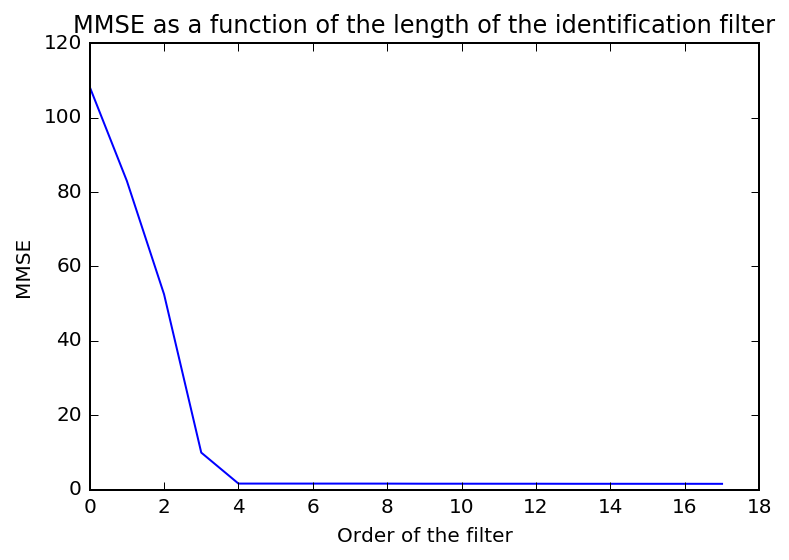

In [10]:
from correlation import xcorr
from scipy.linalg import toeplitz
from numpy.linalg import inv

u=x
d=y
qmax=18 # max value for q
mmse=np.zeros(qmax) # initialize the vector of errors
for q in range(0,qmax):
    c=xcorr(u,u,maxlags=q)[0][q::] #correlation vector
    Ruu=toeplitz(c)
    Rdu=xcorr(d,u,maxlags=q)[0][q::]
    w=inv(Ruu).dot(Rdu)
    # Minimum error
    sigma2d=mean(d**2)
    mmse[q]=sigma2d-w.dot(Rdu)
print("MMSE: ", mmse)
plt.plot(range(0,qmax),mmse)
plt.xlabel("Order of the filter")
plt.ylabel("MMSE")
plt.title("MMSE as a function of the length of the identification filter")
figcaption("MMSE as a function of the length of the identification filter")

The evolution of the MMSE with respect to $q$ shows that the MMSE is important while the  length of the identification filter is underestimated. The MMSE falls to a "floor" when the length is equal to or higher than the true value. This offers an easy way to detect an "optimal" order for the identification. 

\begin{remark}
Actually, the identification error always decreases when one increases the length of the filter, that is add degrees of freedom to perform the identification. Usually, increasing the number of parameters decreases the statistical stability of the estimate, and one has to made a trade-off between a sufficient number of parameters to avoid a bias ans a low number of parameter to lower the variance of the estimate.  This is the notion of bias-variance trade-off that appears in many areas of statistical signal processing. Thus, for choosing an "optimal" order, one usually use a composite criterion where the first term is the MMSE, decreasing with the order, and a second term which increases with the order, thus penalizing high orders. 
\end{remark}

----
<div align=right> [Index](toc.ipynb) - [Back](Lecture3_RandomSignals.ipynb) - [Next](Grad_algo.ipynb)</div>